Linear regression- It is a process of finding a best fititng straight line passing through points with the objective of being able to use the equation of the line as a model for prediction.

# Step 1- Data preprocessing

## a) Understanding the dataset-

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np    
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the dataset
data=pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#It gives the number of total rows and columns in the dataset
data.shape

(50, 5)

In [5]:
#Info function gives the information of each column in the dataset like the type of the columns, number of non-null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
#It Displays the statistics behind each continuous variable
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
#Nunique gives the number of total unique state in the dataset
data["State"].nunique()

3

In [8]:
#Unique gives the names of unique state in the dataset
data["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [9]:
#Gives first five records where state is equal to New York
data[data["State"]=="New York"].head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
3,144372.41,118671.85,383199.62,New York,182901.99
5,131876.90,99814.71,362861.36,New York,156991.12
8,120542.52,148718.95,311613.29,New York,152211.77
15,114523.61,122616.84,261776.23,New York,129917.04


In [10]:
#It gives record where state is equal to California and Profit is equal or greater than 150000
print(data[(data['State']=="California") & (data['Profit']>=150000)])

   R&D Spend  Administration  Marketing Spend       State     Profit
1  162597.70       151377.59        443898.53  California  191792.06
6  134615.46       147198.87        127716.82  California  156122.51


In [11]:
#Here we calculate total profit of each state by using groupby function
profit_state=data['Profit'].groupby([data['State']]).sum()
profit_state

State
California    1766387.98
Florida       1900384.39
New York      1933859.59
Name: Profit, dtype: float64

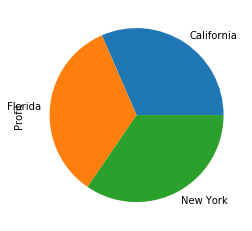

In [12]:
#We plot total profit with respect to state and plot it using pie-chart
profit_state.plot.pie()

From this we cannot say which state has more profit, so for clear understanding bar chart is used.

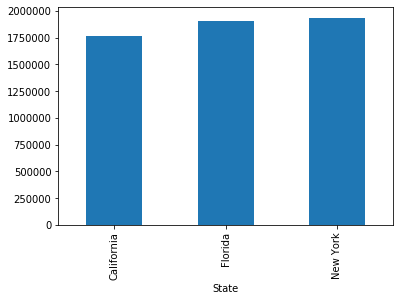

In [13]:
#Plotting total profit with respect to state and plot it using bar chart
profit_state.plot.bar()

From bar chart, we can say that New York is more profitable state.

In [14]:
#Calculating maximum profit of each state by using groupby function
data['Profit'].groupby([data['State']]).max()

State
California    191792.06
Florida       191050.39
New York      192261.83
Name: Profit, dtype: float64

In [15]:
#Calculating minimum profit of each state by using groupby function
data['Profit'].groupby([data['State']]).min()

State
California    14681.40
Florida       49490.75
New York      35673.41
Name: Profit, dtype: float64

In [16]:
#Calculating mean profit of each state by using groupby function
data['Profit'].groupby([data['State']]).mean()

State
California    103905.175294
Florida       118774.024375
New York      113756.446471
Name: Profit, dtype: float64

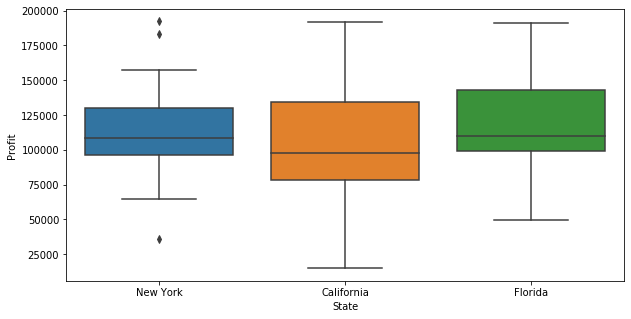

In [17]:
#Comparing profit of different states using seaborn library by plotting boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=data["State"],y=data["Profit"])      

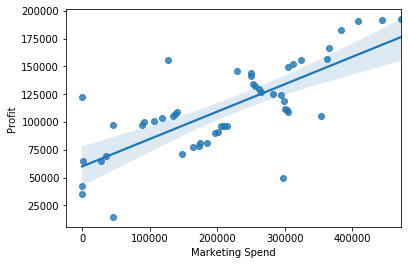

In [18]:
#plotting regression line to determine the relationship between profit and Marketing spend
sns.regplot(y=data["Profit"],x=data["Marketing Spend"])       

In [19]:
#Finding relationship between numeric values
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Text(0.5, 1, 'Correlation Coefficients')

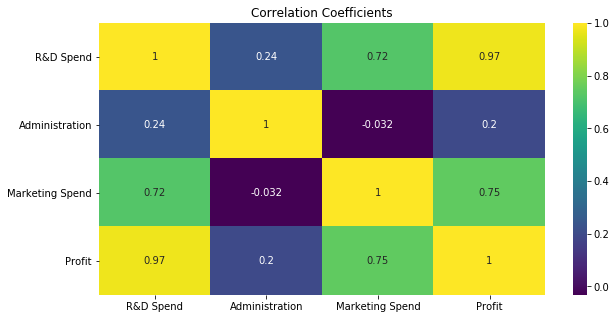

In [20]:
#Plotting the correlation using heatmap, this shows that light colours have positive correlation
plt.figure(figsize=(10,5))
sns.heatmap(data=data.corr(), annot=True, cmap='viridis')
plt.title('Correlation Coefficients')

## b) Handling missing values-

In [21]:
#Checking the total number of null values
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

0 represents,there is no null value in the dataset. Now we divide our dataset into dependent and independent variable.

In [22]:
#Independent variable
datadf=data.drop(columns=["Profit"])
datadf.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [23]:
#Dependent variable
targetdf=data["Profit"]
targetdf.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [24]:
#Checking the total number of rows and columns in independent set i.e datadf
datadf.shape

(50, 4)

In [25]:
#Checking the total number of rows and columns in dependent set i.e targetdf
targetdf.shape

(50,)

##  C) Feature engineering-
It is used to convert the category(object) columns into numeric column. It is an important step to create a model because without converting the columns, model cannot be made. For this we have to import LabelEncoder from sklearn library which gives label to categorical columns.

In [26]:
from sklearn.preprocessing import LabelEncoder
#Instantiate labelencoder object on all the categorical variables
le=LabelEncoder()
#Fitting the categorical column
datadf["State"]=le.fit_transform(datadf["State"])

In [27]:
#Checking the result after encoding
datadf.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


## D) Assumption of Regression-

The value of skewness and kurtosis should be between -1 to 1.

In [28]:
#Importing stats package from scipy library
from scipy import stats

In [29]:
#Checking skewness of independent variables
stats.skew(datadf)

array([ 0.15904052, -0.47423007, -0.04506632,  0.        ])

In [30]:
#Checking kurtosis of independent variable
stats.kurtosis(datadf)

array([-0.80506764,  0.08553841, -0.72403271, -1.52941176])

In [31]:
#Checking skewness of dependent variables
stats.skew(targetdf)

0.02258638356958943

In [32]:
#Checking skewness of dependent variables
stats.kurtosis(targetdf)

-0.17529637679752152

# Step 2- Developing the model-

## a) Splitting the dataset-
In this we divide the dataset into training and test set, so that we train the model in training set and test it on training set. Both dependent and independent variable are divided into training and test set. By default the data is divided into two parts i.e 75% and 25%. For this we have to import train_test_split from sklearn library and use random seed so that it divide the same data each time.

In [32]:
#Splitting the dataset and printing dimension
np.random.seed(1000)
from sklearn.model_selection import train_test_split
x_trg, x_test, y_trg, y_test = train_test_split(datadf, targetdf, random_state=0)
print("Dimension of training dataset:", x_trg.shape)
print("Dimension of test dataset:", x_test.shape)

Dimension of training dataset: (37, 4)
Dimension of test dataset: (13, 4)


## b) Importing the desired model and fitting the values-
Here we use Linear Regression model because the target variable is in continuous form.

In [33]:
#Importing the model and create it
from sklearn import linear_model
model=linear_model.LinearRegression()

In [34]:
#fitting the training dataset in our model
model.fit(x_trg,y_trg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 # Step 3- Predicting the model

In [35]:
#Predicting the test results
predicted=model.predict(x_test)
predicted

array([104857.41104282, 132192.84338785, 133322.963019  ,  72110.67322561,
       179086.14893162, 114829.75156248,  65940.13335569,  98671.39019185,
       114454.33290684, 168407.96691121,  96180.82153851,  87641.57271011,
       110907.68006026])

# Step 4- Determining the accuracy of model-
In Linear Regression accuracy of model is determined by mean squared error and r2 score.

In [36]:
#Importing mean_squared_error from sklearn library and sqrt is used to find the square root.
from math import sqrt
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(y_test,predicted))

8530.541916373628

In [37]:
#Importing r2_score from sklearn library
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predicted)
print(r2)

0.9325447894242298


The result shows that the model is 93% accurate.

# Step 5- Testing the model

In [38]:
#Printing x_training first five records so that we can give the data for testing according to the record
x_trg.head()

,R&D Spend,Administration,Marketing Spend,State
34,46426.07,157693.92,210797.67,0
18,91749.16,114175.79,294919.57,1
7,130298.13,145530.06,323876.68,1
14,119943.24,156547.42,256512.92,1
45,1000.23,124153.04,1903.93,2


In [39]:
#Giving users data and fit it into model and predict it
user_data=pd.DataFrame([[80000,130000,200000,1]])
ans=model.predict(user_data)
print(ans)

[116090.3803603]


The model predict that when R&D Spend is 80000, Administration Spend is 130000, Marketing Spend is 200000 and State is 1, the profit will be 1,16,090 approx.